In [1]:
import sys
sys.path.append('./../../')

import ikamoana.ikaseapodym as ikadym
import matplotlib.pyplot as plt

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug
from ikamoana.utils import convertToDataArray, convertToMeters

In [2]:
configuration_filepath = "./../../data/ikamoana_config/IkaSim_Example_Fish.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [4]:
# my_sim.oceanToNetCDF(to_dataset=True)

In [5]:
diff_y_ika = convertToDataArray(my_sim.ocean.Ky)
diff_y_sea = seapodymFieldConstructor(
    '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/'
    'output/run-interim_2x30d_po/skj_diffusion_5th_cohort_16_91.dym')
diff_y_sea = diff_y_sea.loc[:,50.5:-39.5,119.5:289.5]
diff_y_sea = convertToMeters(diff_y_sea, timestep=30*24*60*60, square=True)

In [6]:
diff_y_ika.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2003-01-15
  * lat      (lat) float32 -39.5 -37.5 -35.5 -33.5 -31.5 ... 44.5 46.5 48.5 50.5
  * lon      (lon) float32 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5

In [7]:
diff_y_sea.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2003-01-15
  * lat      (lat) float32 50.5 48.5 46.5 44.5 42.5 ... -33.5 -35.5 -37.5 -39.5
  * lon      (lon) float32 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5

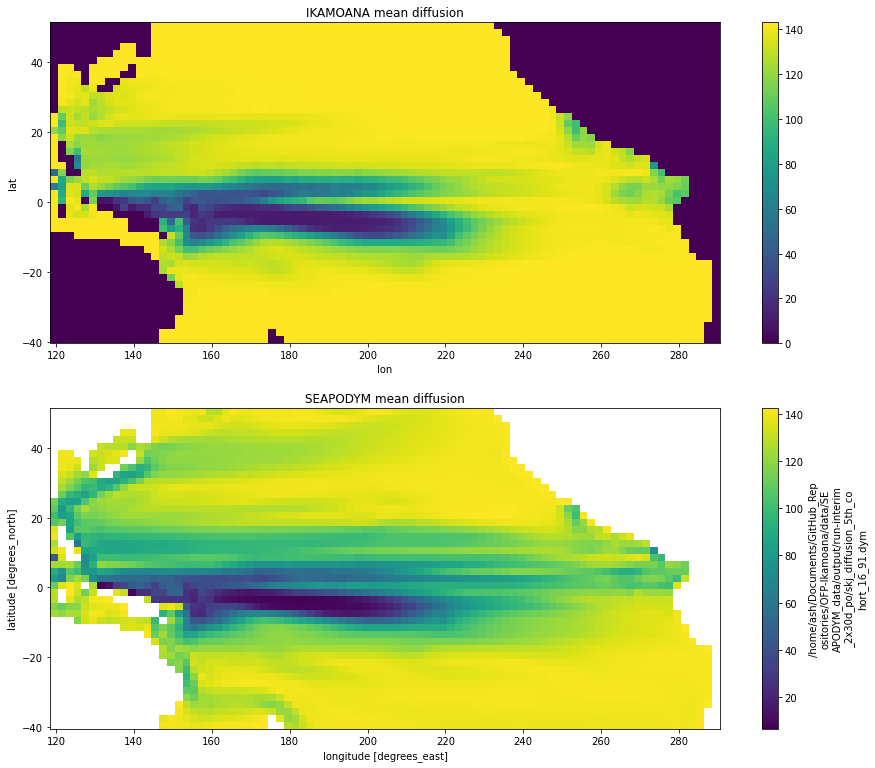

In [8]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,13))

abs(diff_y_ika).mean(axis=0).plot(ax=ax1)
abs(diff_y_sea).mean(axis=0).plot(ax=ax2)

ax1.set_title("IKAMOANA mean diffusion")
ax2.set_title("SEAPODYM mean diffusion")

plt.show()

In [9]:
print("IKAMOANA :\n",abs(diff_y_ika).max(axis=(1,2)),end="\n\n")
print("SEAPODYM :\n",abs(diff_y_sea).max(axis=(1,2)))

IKAMOANA :
 <xarray.DataArray (time: 37)>
array([142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153, 142.94153, 142.94153, 142.94153, 142.94153, 142.94153,
       142.94153], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2003-01-15

SEAPODYM :
 <xarray.DataArray '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/output/run-interim_2x30d_po/skj_diffusion_5th_cohort_16_91.dym' (time: 37)>
array([142.9198 , 142.87727, 142.86757, 142.81812, 142.7988 , 142.81946,
       142.84929, 142.8526 , 142.8727 , 142.89944, 142.7991 , 142.79213,
       142.90987, 142.92932, 142.9328 , 142.84267, 142.85725, 142.85481,
  

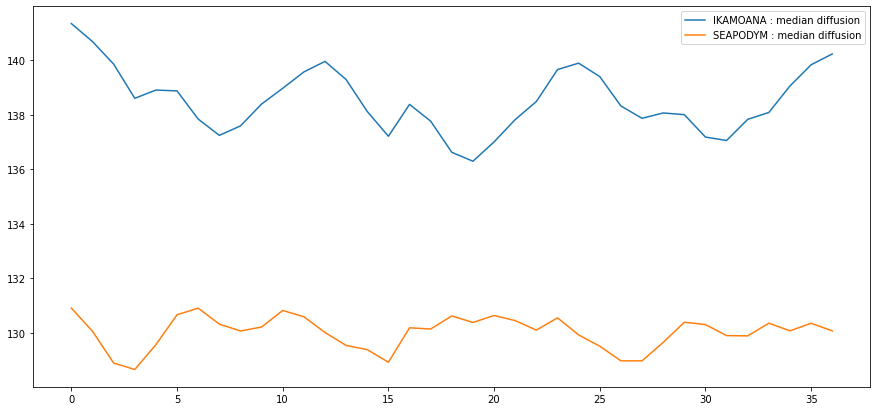

In [19]:
plt.subplots(1,1,figsize=(15,7))

plt.plot(abs(diff_y_ika).median(axis=(1,2)))
plt.plot(abs(diff_y_sea).median(axis=(1,2)))

plt.legend(('IKAMOANA : median diffusion','SEAPODYM : median diffusion'))
plt.show()